# 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline
features = ['X1', 'X2', 'X3', 'X4','X5', 'X6', 'X7', 'X8', 'X9'] 
f_len = len(features)

# 2. Импорт данных

In [2]:
data = pd.read_excel('ЛР 1.xlsx', index_col='Регион', sheet_name='Данные').loc[:, features]

data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,9.212794,4.393977,23864,4.888962,4.896903,3.735763,16.4,7.702695,1.184
Амурская область,9.620554,5.608319,35499,5.208003,6.866272,3.885274,16.1,17.567293,6.098
Архангельская область,8.156995,5.349659,36779,4.754055,2.245869,2.968140,14.6,17.113520,12.356
Астраханская область,8.742148,6.267783,25199,5.094280,1.617232,2.350040,13.6,11.270083,3.494
Белгородская область,6.998984,4.071958,32841,5.422743,2.221900,1.339021,15.5,10.946124,7.374


## 3. Стандартизация данных

In [3]:
scaled = (data - data.mean(axis=0))/data.std()
scaled

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,0.550909,-0.456354,-0.625030,-0.354471,1.077778,1.051521,0.610943,-0.294640,-0.816480
Амурская область,0.864949,0.767179,0.199023,0.241207,2.142743,1.169850,0.516397,0.143576,0.086356
Архангельская область,-0.262225,0.506562,0.289679,-0.606353,-0.355807,0.443996,0.043666,0.123418,1.236121
Астраханская область,0.188435,1.431635,-0.530478,0.028876,-0.695752,-0.045192,-0.271488,-0.136165,-0.392070
Белгородская область,-1.154079,-0.780811,0.010769,0.642145,-0.368769,-0.845349,0.327305,-0.150557,0.320792
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.757579,-1.683297,-0.573186,-1.426533,-1.534643,-1.826316,-2.603629,-0.588789,-0.895482
Чувашская Республика,0.092687,0.255755,-0.816896,0.019112,-0.306261,-0.503082,0.295789,-0.544475,-0.559078
Чукотский автономный округ,3.225378,2.428669,4.026564,2.099932,2.730534,1.966008,-1.279981,0.891237,3.152764


# 4. Построение дендрограмм

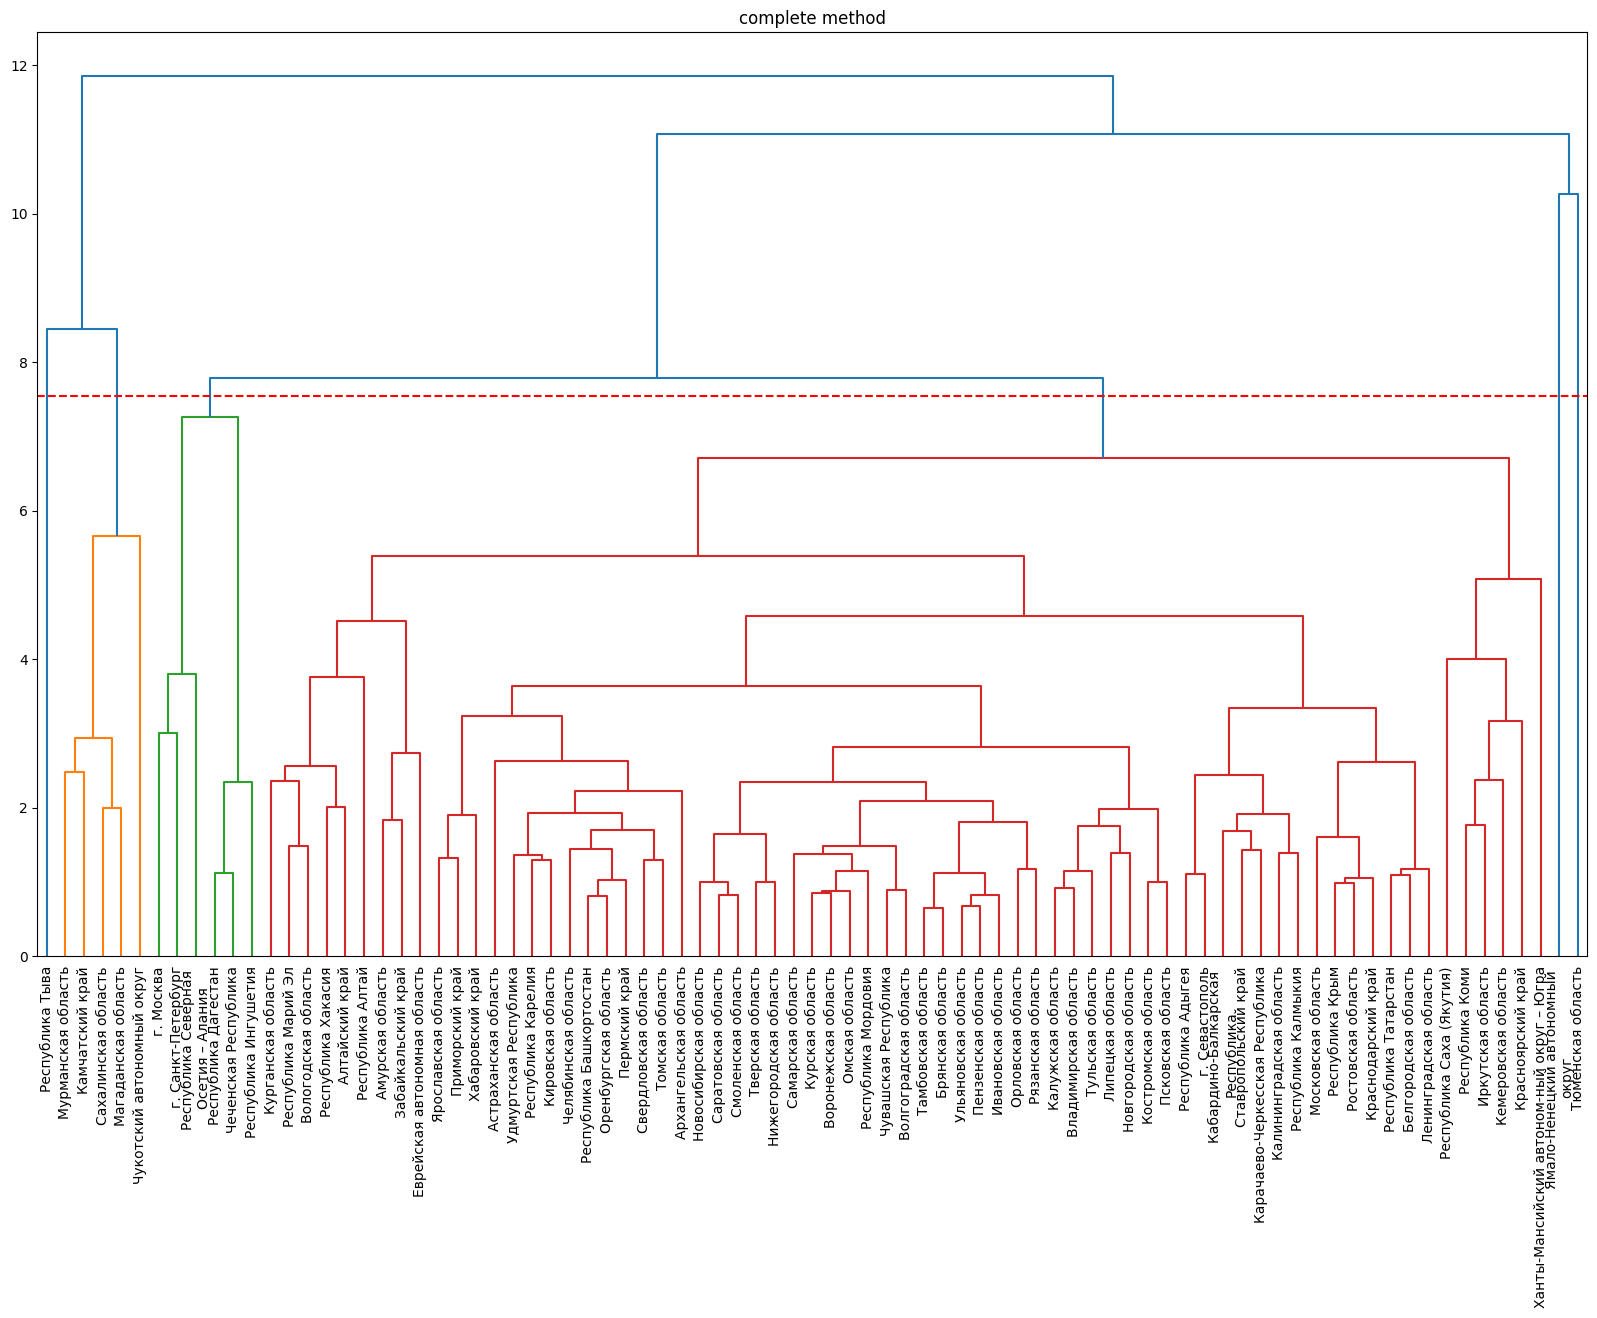

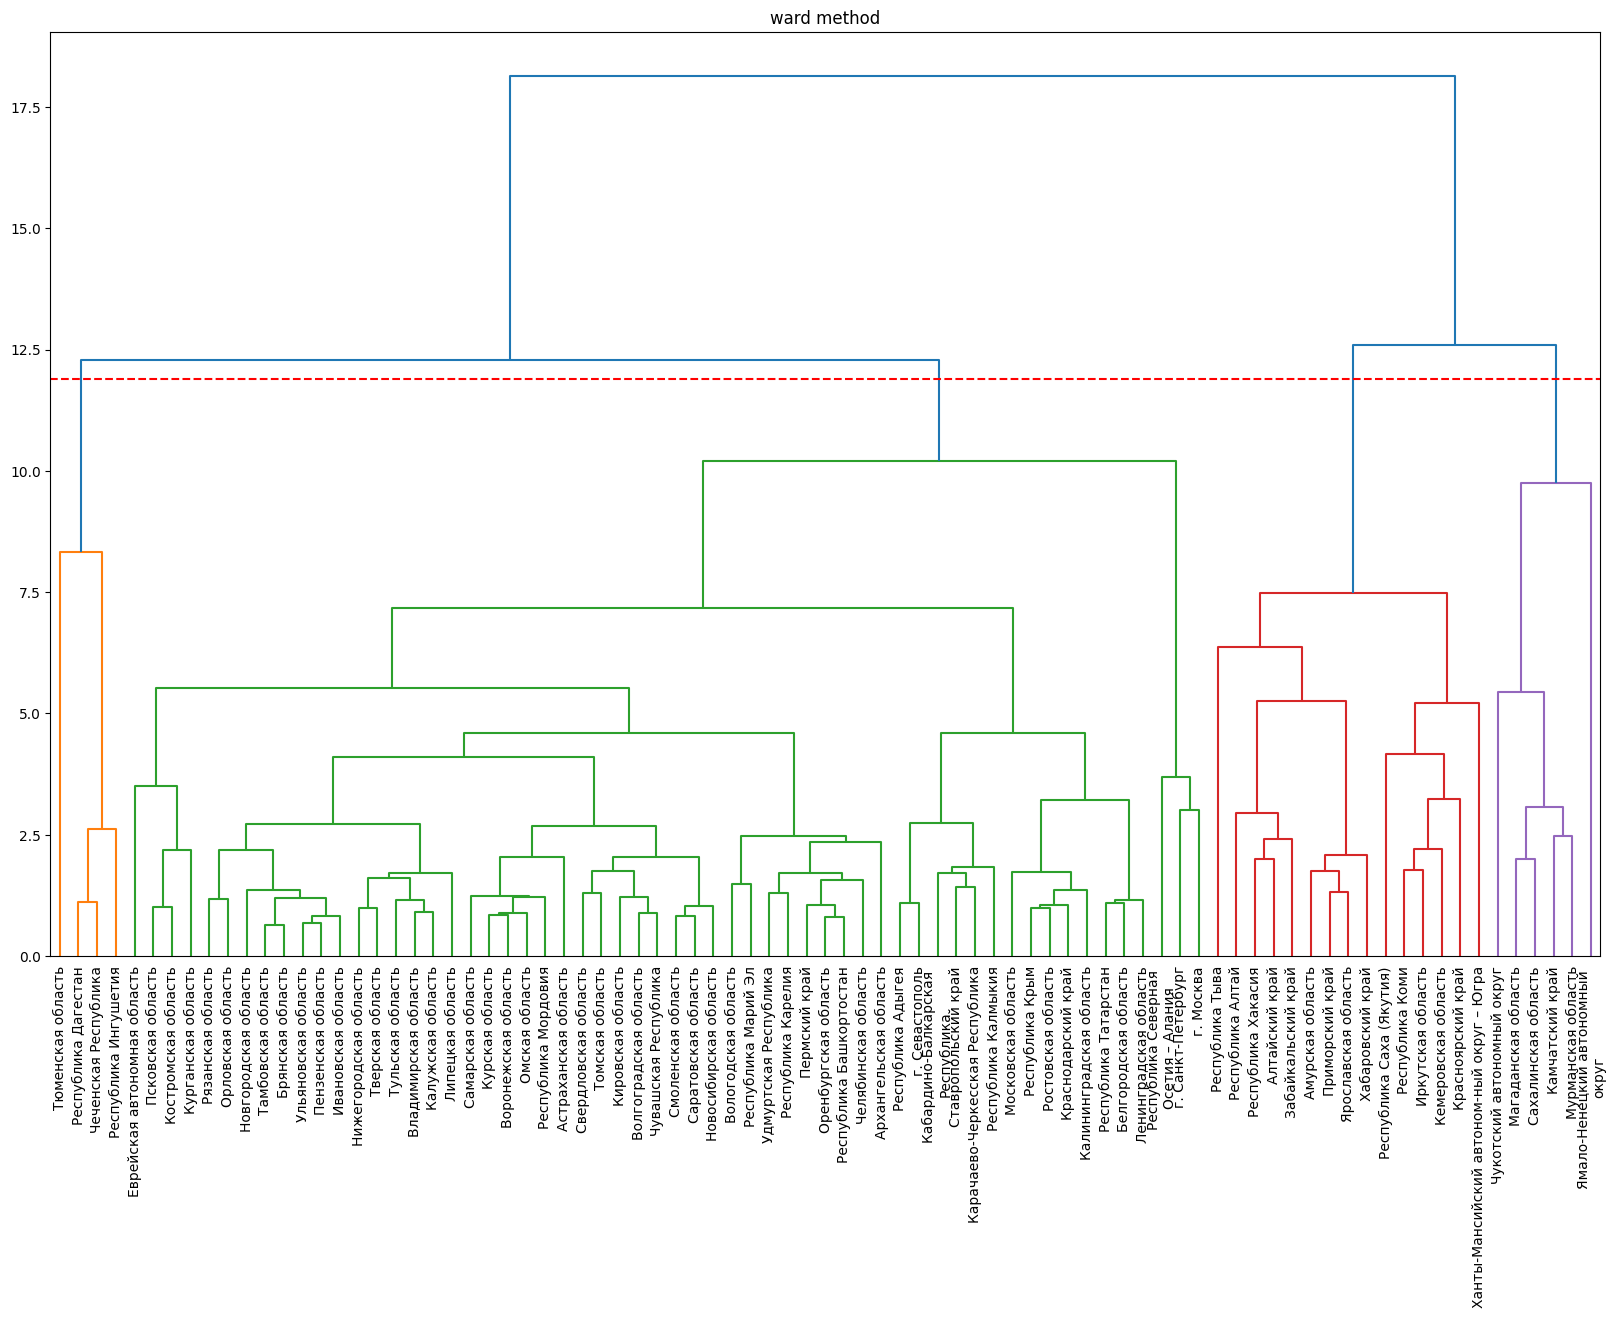

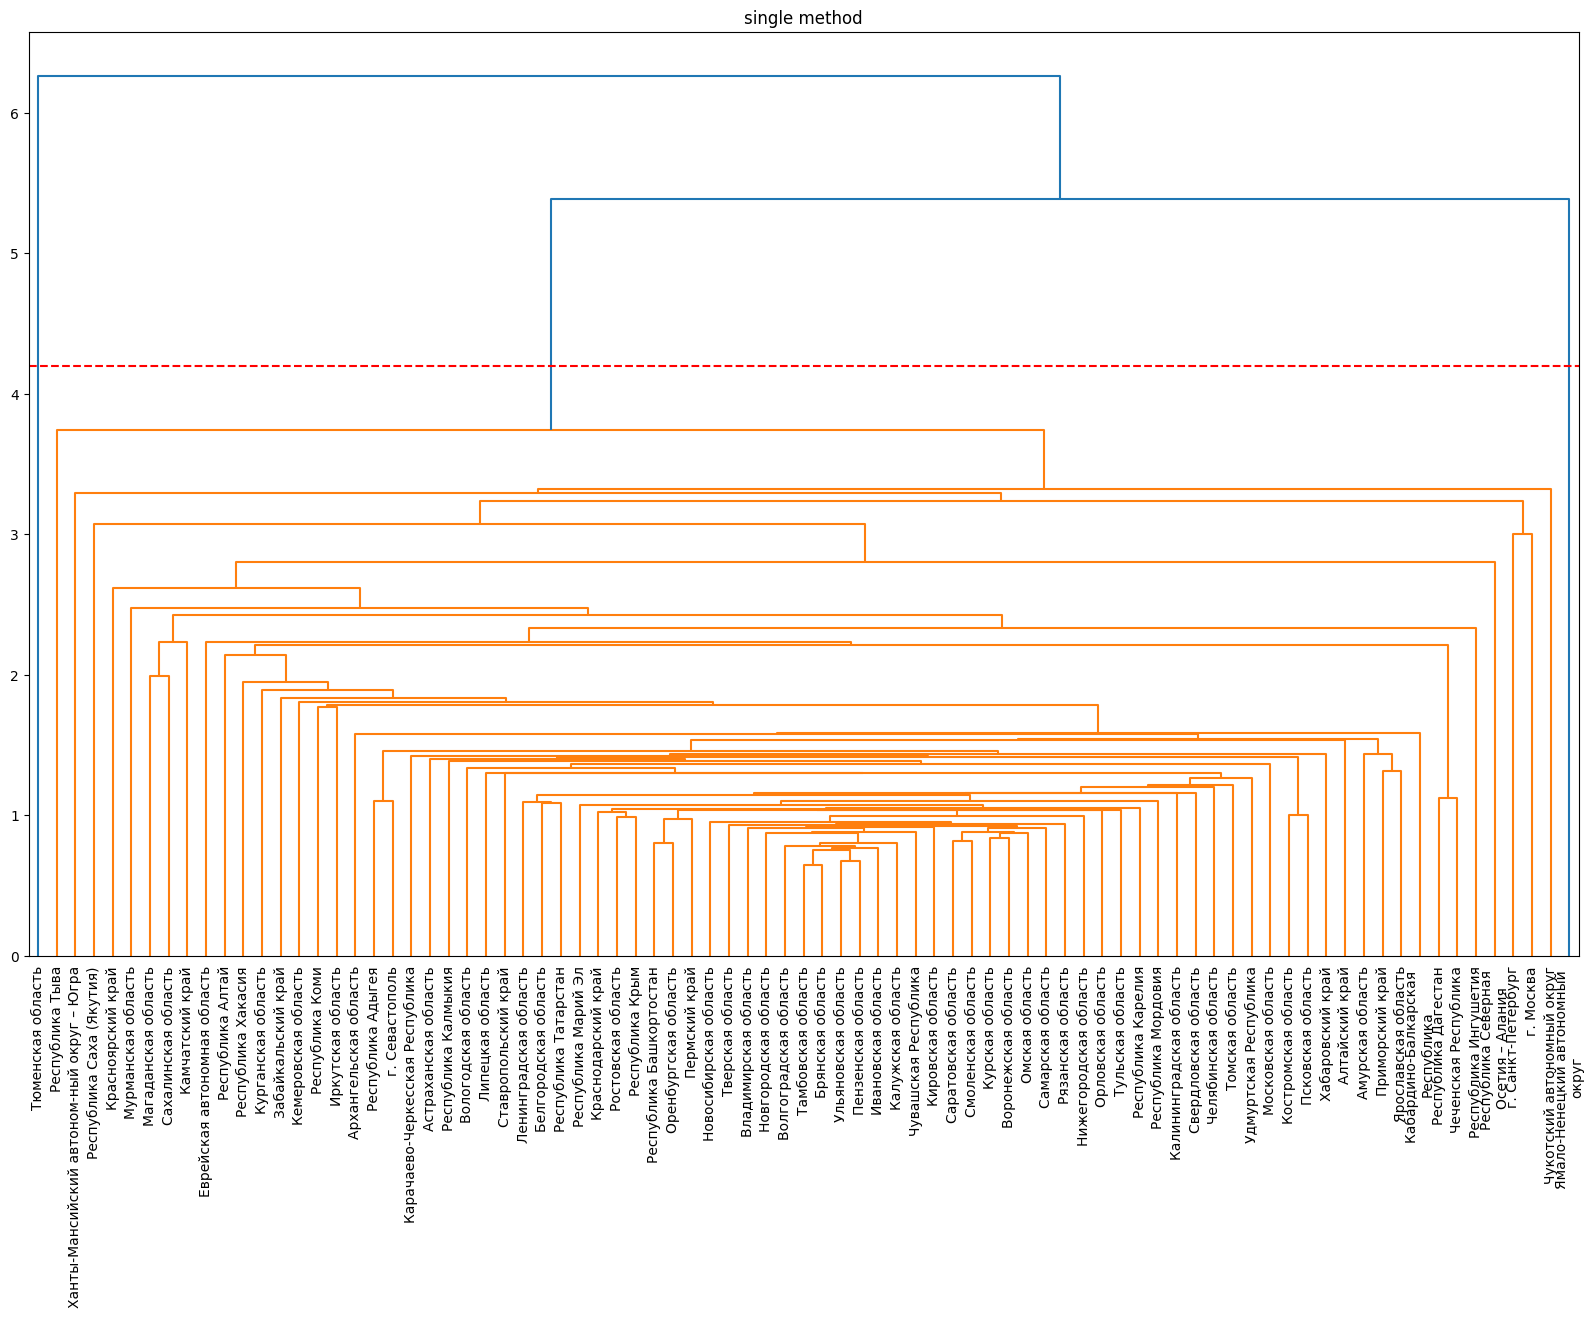

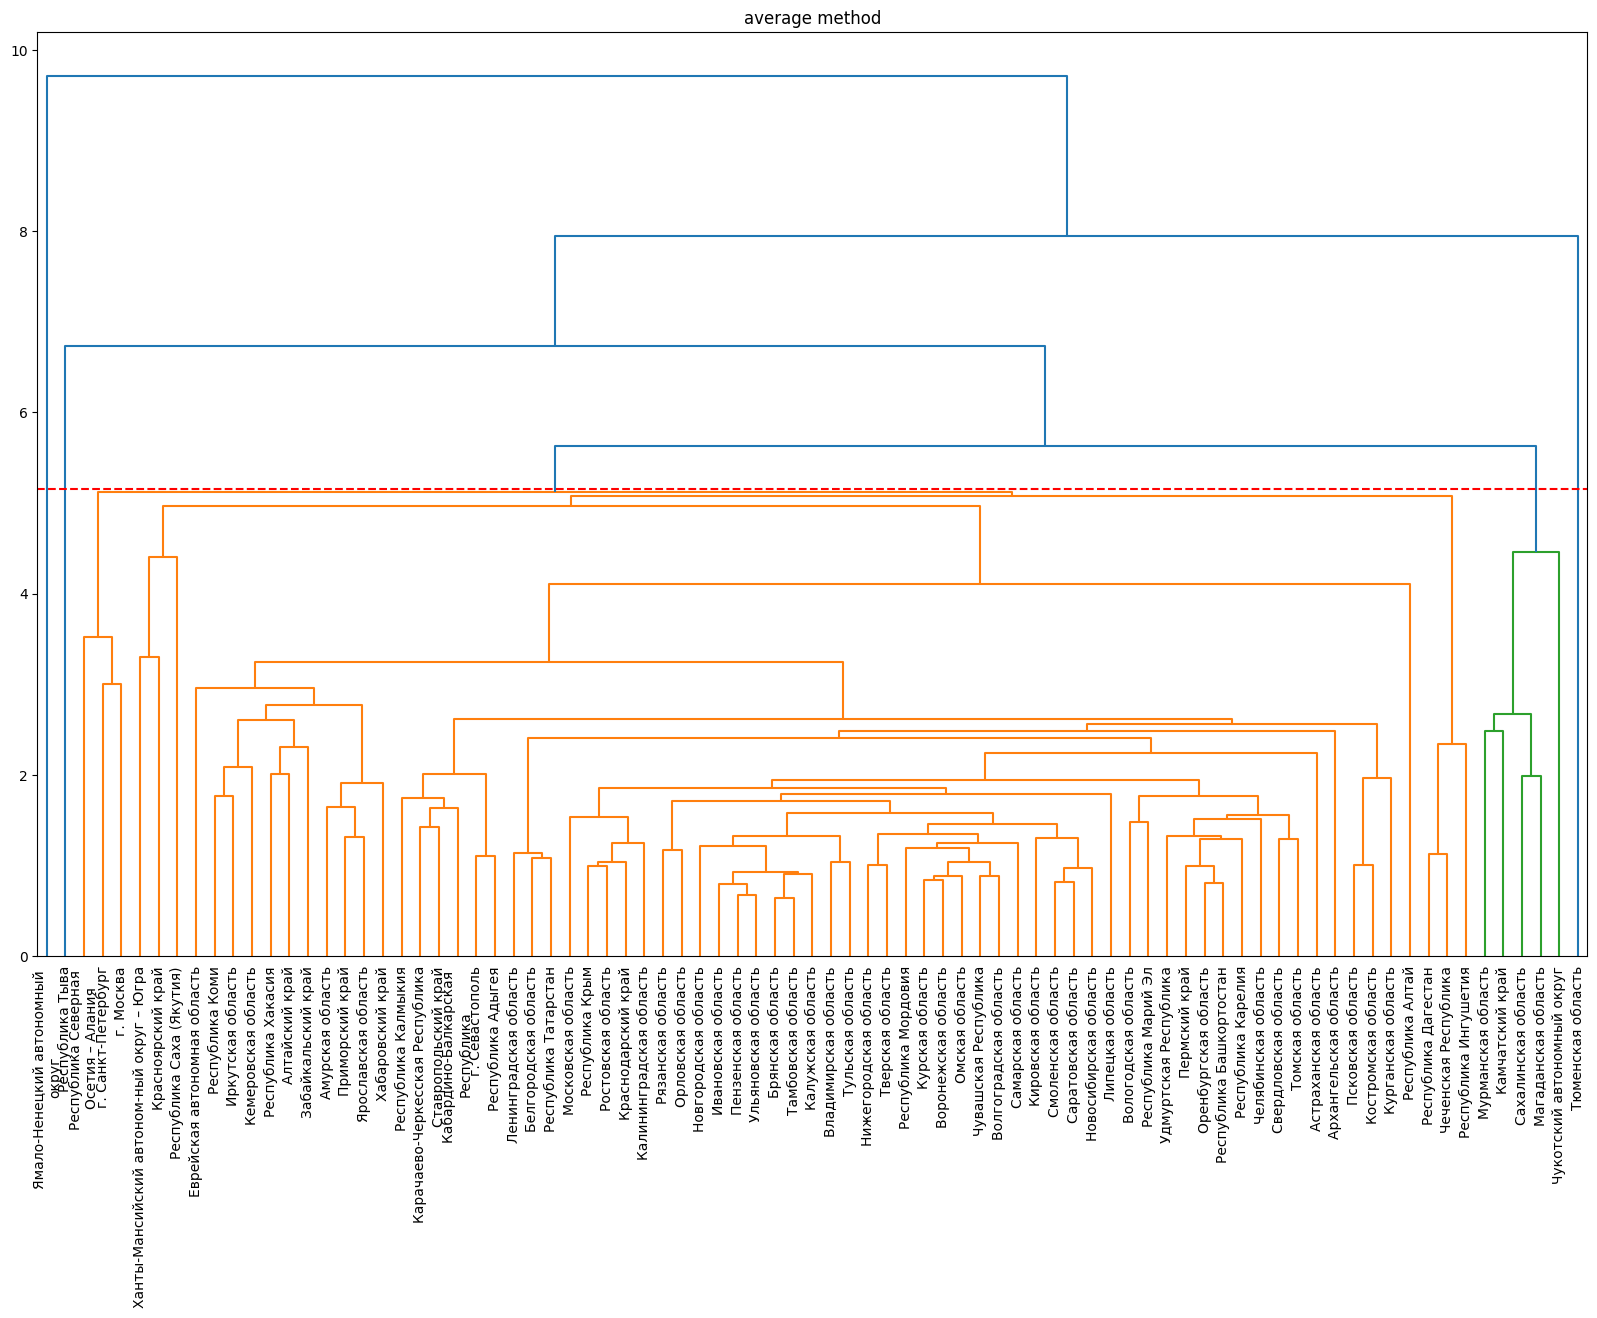

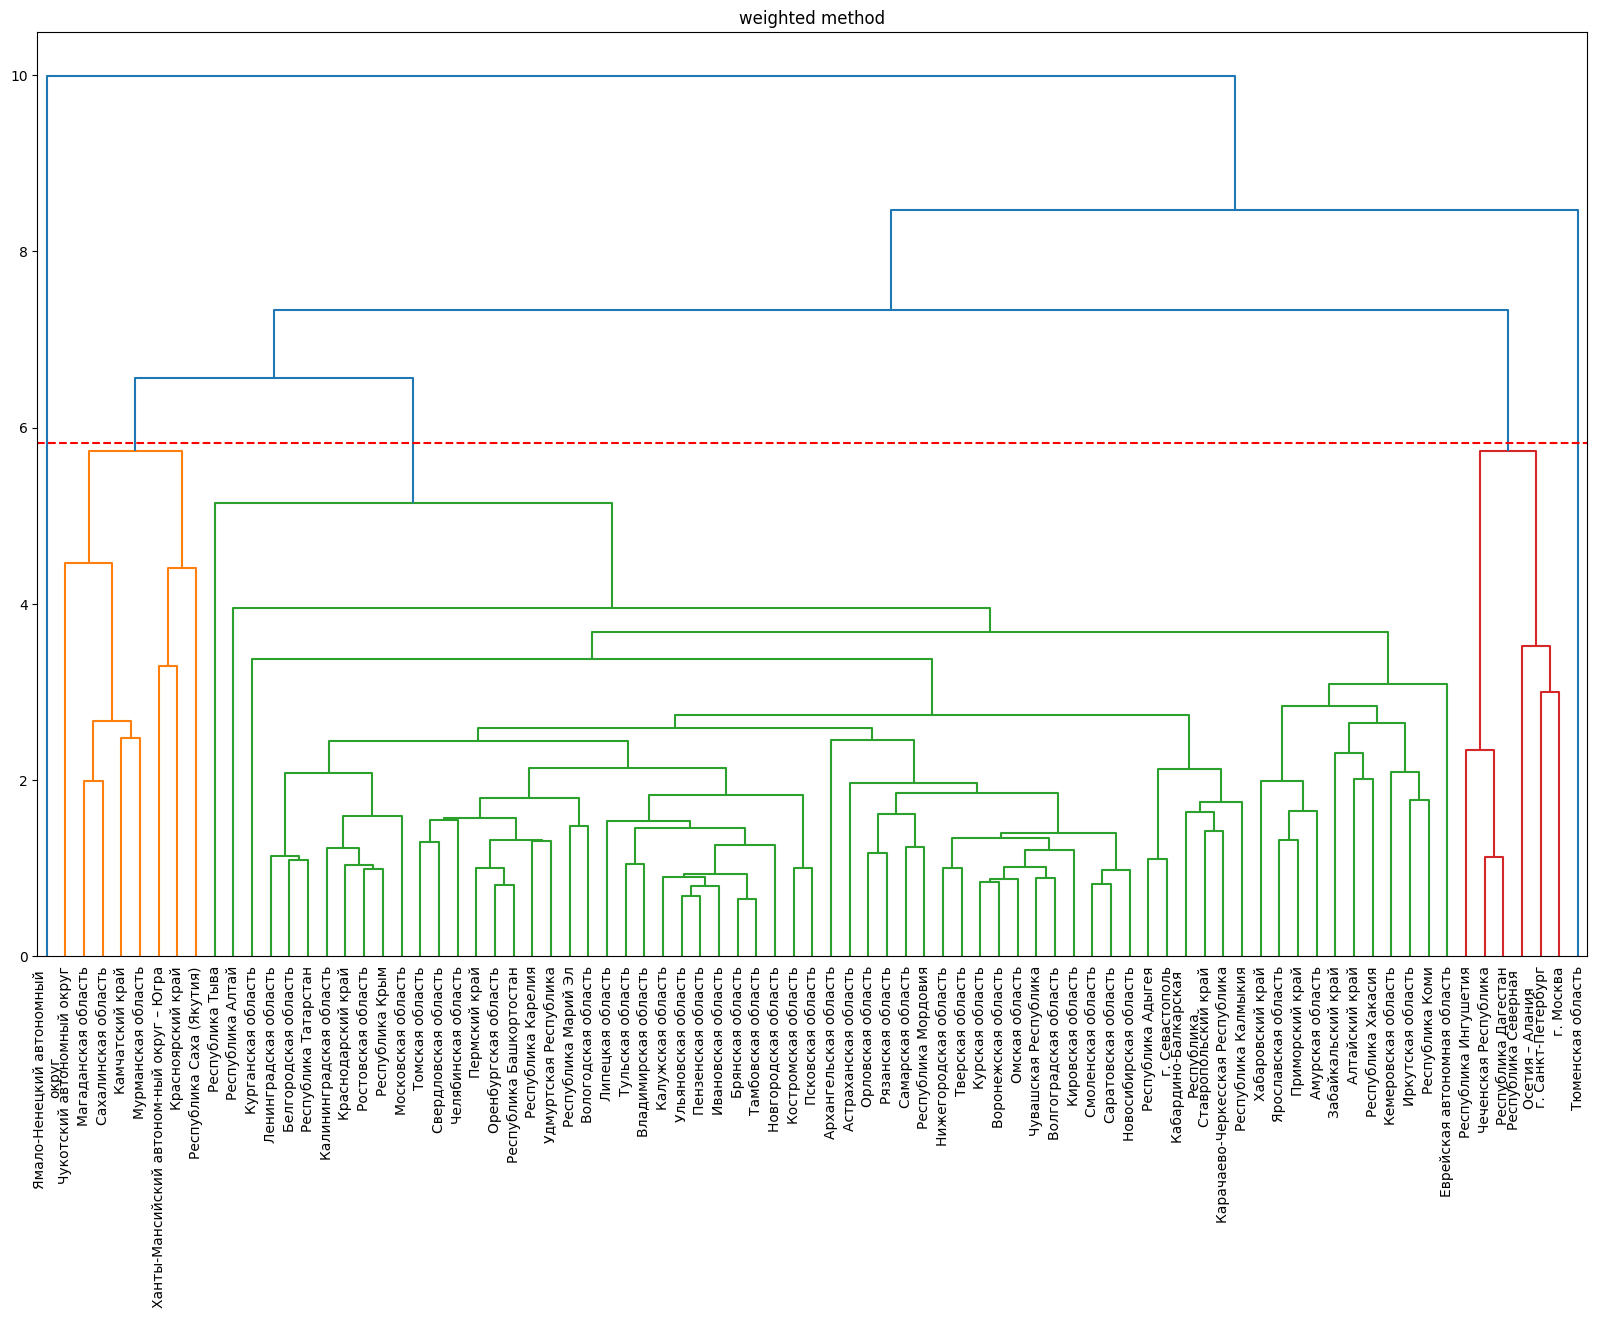

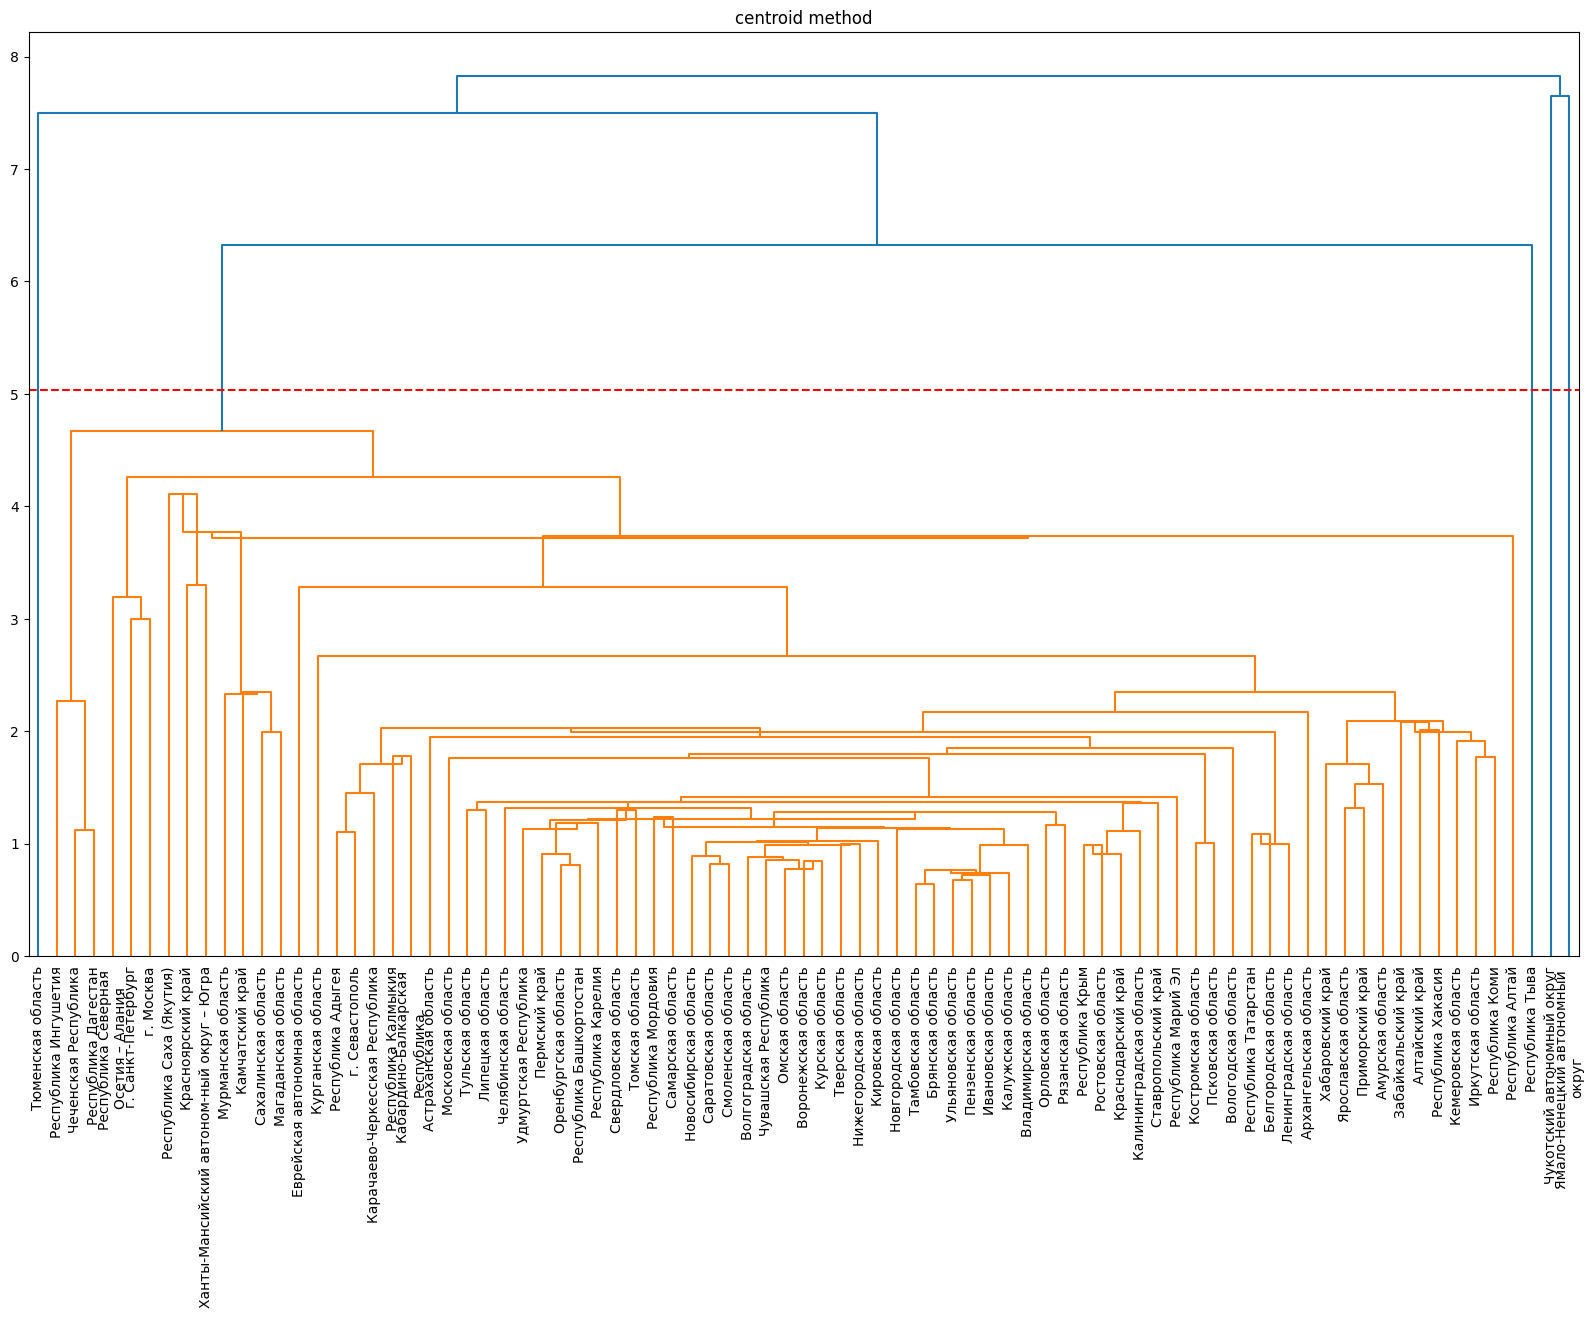

In [5]:
#нужно удалить методы, которые вам не нужны
CLUSTER_METHODS = ["complete", "ward", "average","single", "weighted"]
def dendra(data,method,threshold):
  Z = hierarchy.linkage(data, method=method, optimal_ordering=True)
  plt.figure(figsize=(20,12)) 
  hierarchy.dendrogram(Z, labels=data.index, leaf_font_size=10,color_threshold=threshold) 
  plt.axhline(y=threshold, color='r', linestyle='--')
  plt.title('{} method'.format(method))
#здесь задаем свои пороговые значения и удаляем строки с теми методами, которые вы не использлвали в своей ЛР
dendra(scaled,'complete',7.54) 
dendra(scaled,"ward",11.8914616)
dendra(scaled,"single",4.2)
dendra(scaled,"average",5.1505)
dendra(scaled,"weighted",5.82)
dendra(scaled,"centroid",5.03)

## 5. Кластеризация.

In [6]:
#удаляете ненужные методы
CLUSTER_METHODS = ["complete", "ward", "kmeans", "single", "average", "weighted"]
N_CLUSTERS = {
    "complete" : 6,
    "ward"     : 6,
    "kmeans"  : 6,
    "single" : 6,
    "average" : 6,
    "weighted" : 6,
}
#метод полных связей
complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled)
print("complete\n",complete.labels_+1,"\n")

#метод Ward'a
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled)
print("ward\n",ward.labels_+1,"\n")

#метод k-means
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'])
kmeans.fit(scaled)
print("kmeans\n",kmeans.labels_+1,"\n")

#метод одиночных связей
single = AgglomerativeClustering(n_clusters=N_CLUSTERS['single'], linkage='single')
single.fit(scaled)
print("single\n",single.labels_+1,"\n")

#метод невзвешенного попарного среднего
average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
average.fit(scaled)
print("average\n", average.labels_+1,"\n")

#метод взвешенного попарного среднего
z = scipy.cluster.hierarchy.weighted(scipy.spatial.distance.pdist(scaled))
#нужно вписать число (здесь 5.82), которое делит на нужно кол-во классов(посмотреть по соответствующей дендрограмме)
weighted = scipy.cluster.hierarchy.fcluster(z, 5.82,  criterion='distance') 
print("weighted\n", weighted)



complete
 [3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 6 3 6 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 1 3 5 3 3 3 3 3 6 3 3 3 3 3 3 3 4 3
 3 3 3 3 1 3 6 2 3] 

ward
 [3 3 2 2 2 2 2 2 2 2 5 5 2 2 3 2 3 2 2 2 4 2 3 2 2 2 3 2 2 2 2 4 2 4 2 2 2
 2 2 2 2 2 3 2 2 3 2 1 1 2 2 3 2 2 2 3 5 2 3 3 2 2 2 2 4 2 2 2 2 2 2 2 1 2
 2 3 3 2 1 2 4 6 3] 

kmeans
 [4 4 2 2 2 2 2 2 2 2 6 6 2 4 4 2 4 1 2 2 5 1 4 2 2 2 3 2 2 2 2 5 2 5 2 2 2
 2 2 2 2 2 4 2 1 4 2 1 1 2 2 4 2 2 2 4 6 2 4 4 2 2 2 2 5 2 2 2 2 2 2 2 1 2
 2 2 3 2 1 2 5 3 2] 

single
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1
 1 1 6 1 1 1 2 3 1] 

average
 [1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 4 1 1 1 1 1 2 1 1 1 1 1 1 1 6 1
 1 1 1 1 1 1 2 5 1] 

weighted
 [2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 3 2 3 2 2 2
 2 2 2 2 2 2 2

## 6. Работа с метками кластеров. Построение графиков средних значений.

In [7]:
#добавялем результаты кластеризации
scaled['complete'] = complete.labels_
scaled['ward'] = ward.labels_
scaled['kmeans'] = kmeans.labels_
scaled['single'] = single.labels_
scaled['average'] = average.labels_
scaled['weighted'] = weighted

def mean_df(method, n_clust): #нахождение координат центра класса
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled[scaled[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled[scaled[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )

for method in CLUSTER_METHODS:
    print(means[method])

                  X1        X2        X3        X4        X5        X6  \
complete_0 -1.007574  0.941158  0.649743 -0.188208 -1.384338 -1.634157   
complete_1 -0.762519  1.196952  4.053974  1.278391  0.777505  0.143690   
complete_2 -0.072521 -0.154667 -0.282679 -0.000323 -0.010068  0.050317   
complete_3 -1.020935 -2.622708  1.230239 -5.898619 -0.845990 -0.987840   
complete_4  1.622311  0.179739 -0.971507 -2.323470  3.959030  3.247888   
complete_5  2.242111  1.254218  2.258736  1.619042  1.022039  0.785870   

                  X7        X8        X9  count  
complete_0 -1.752712 -0.600323 -0.736038    6.0  
complete_1 -2.666659  6.418154  4.036492    1.0  
complete_2  0.283000 -0.089091 -0.160600   69.0  
complete_3 -1.626651  1.910040  1.584652    1.0  
complete_4 -1.658166 -0.566012 -0.549708    1.0  
complete_5 -0.611855  0.397404  2.085235    5.0  
              X1        X2        X3        X4        X5        X6        X7  \
ward_0 -1.704919 -1.374302 -0.041571 -2.188545 -1.3

## 7. Построение графиков средних.

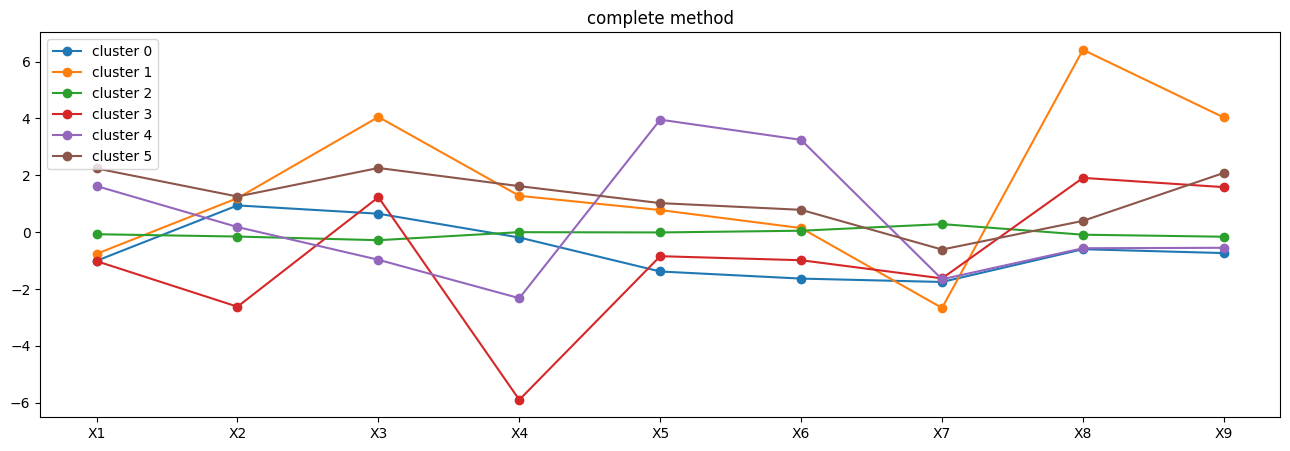

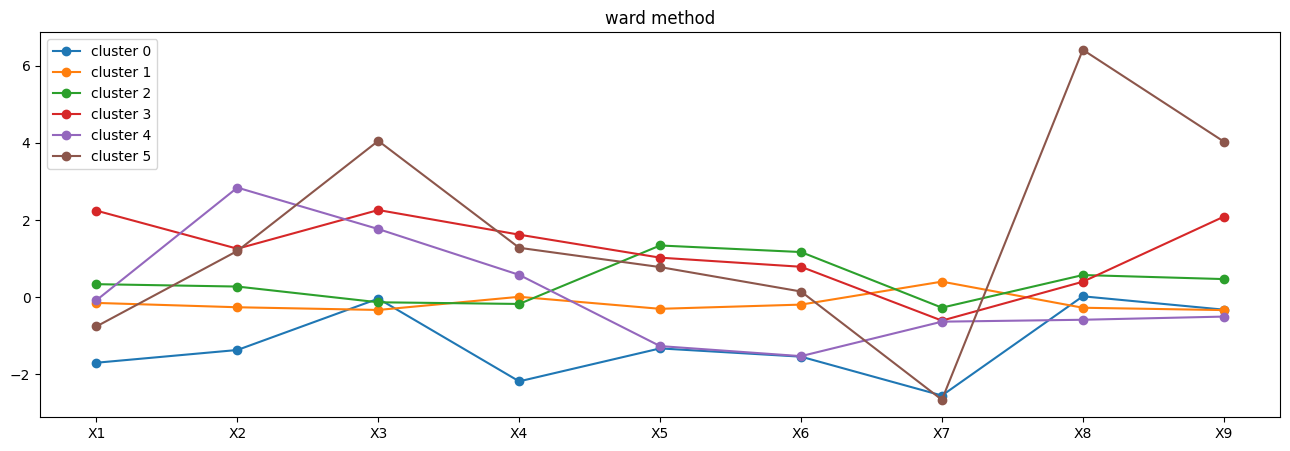

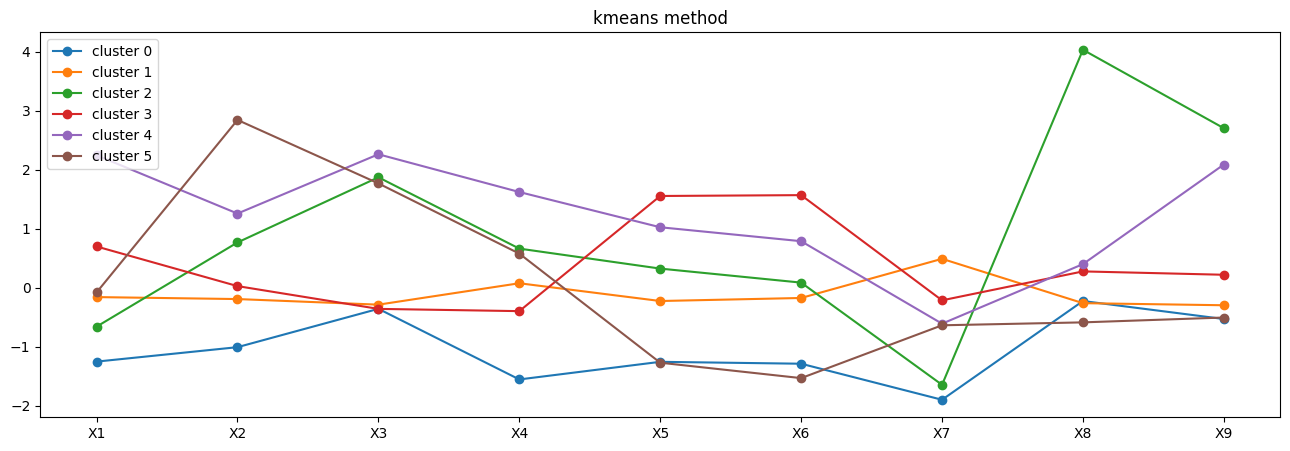

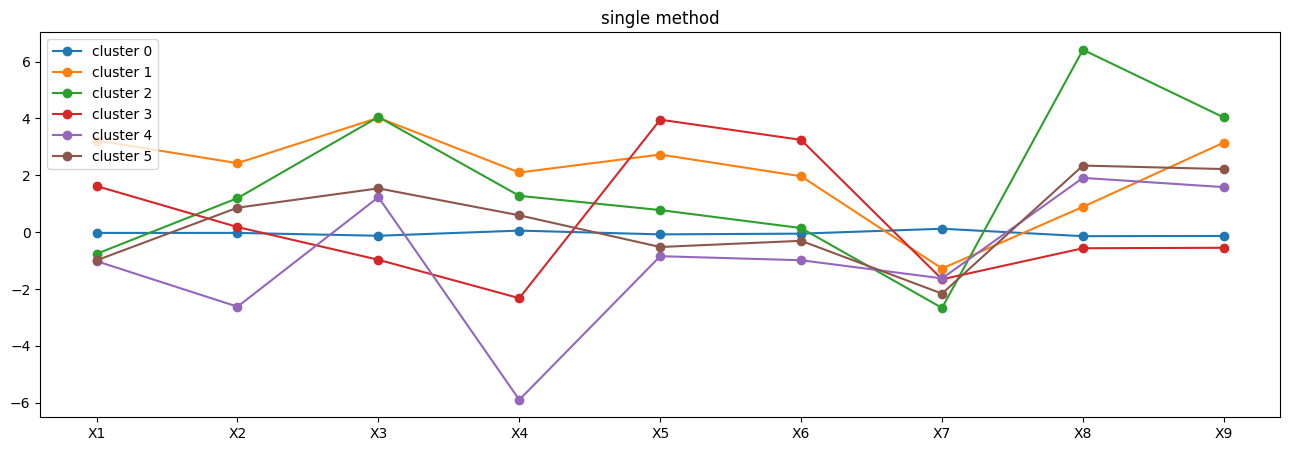

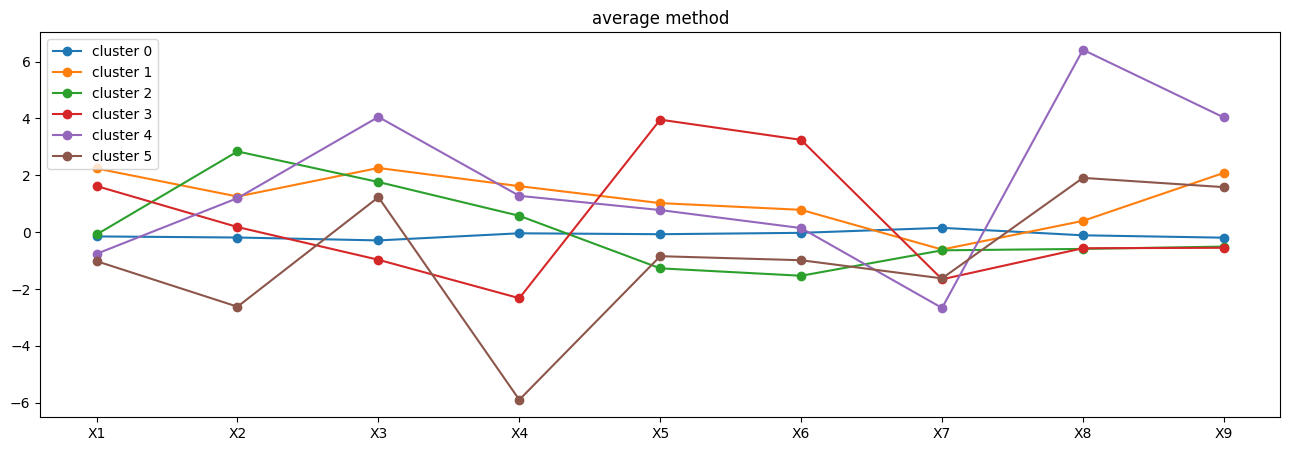

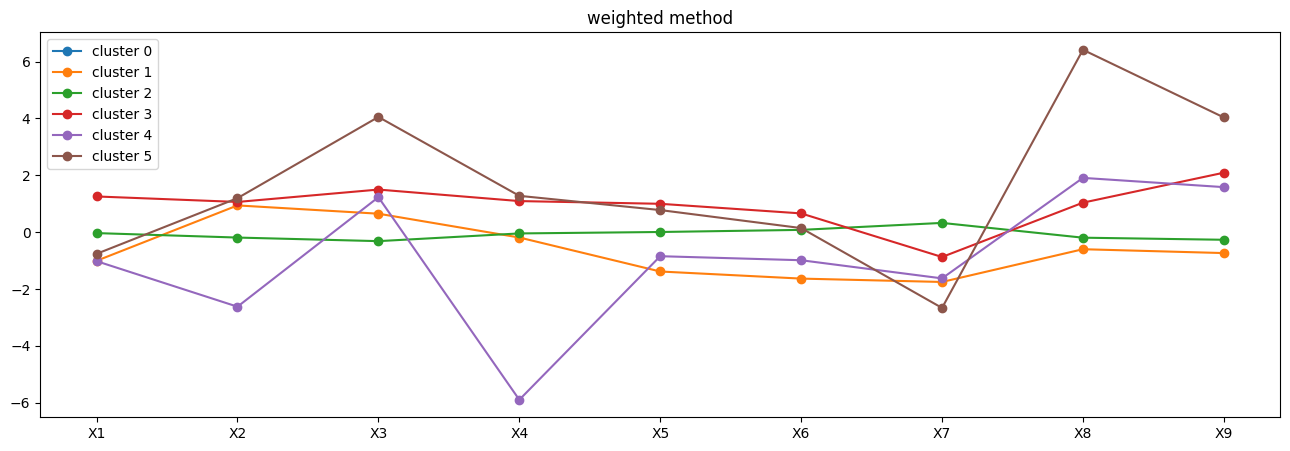

In [8]:
for method in CLUSTER_METHODS:
    cur_mean = means[method] 
    plt.figure(figsize=(16,5))
   #для каждого кластера из данного метода строим график
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1], marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') #легенда графика
    plt.title('{} method'.format(cur_mean.index[1][:-2])) #название 


## 8. Выгрузка элементов в кластерах.

In [10]:

cluster_dict = {}

for method, n in N_CLUSTERS.items():
     #выводим заголовки методов
    print('{} method\n'.format(method)) 
    #для каждого кластера проходимся по объектам и записываем их в словарь
    for i in range(n): 
        cluster_dict['{}_{}'.format(method, i)] = scaled[scaled[method]==i][features] 
                
        #выводим на экран состав кластеров
        print ('Состав кластера {}: {}'.format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')


complete method

Состав кластера 0: ['г. Москва' 'г. Санкт-Петербург' 'Республика Дагестан'
 'Республика Ингушетия' 'Республика Северная \nОсетия – Алания'
 'Чеченская Республика']
Состав кластера 1: ['Ямало-Ненецкий автономный \nокруг']
Состав кластера 2: ['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'г. Севастополь' 'Еврейская автономная область'
 'Забайкальский край' 'Ивановская область' 'Иркутская область'
 'Кабардино-Балкарская \nРеспублика' 'Калининградская область'
 'Калужская область' 'Карачаево-Черкесская Республика'
 'Кемеровская область' 'Кировская область' 'Костромская область'
 'Краснодарский край' 'Красноярский край' 'Курганская область'
 'Курская область' 'Ленинградская область' 'Липецкая область'
 'Московская область' 'Нижегородская область' 'Новгородская область'
 'Новосибирская область' 'Омская об

## 9. Функционал качества разбиения

In [11]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
#def Q - функционал качества разбиения для конкретного кластера в методе
#method_num – строки кластера, mean_data_row – строка со средними значениями признаков для данного кластера    
def Q(method_num, mean_data_row):
    q = 0 
    #Проходимся по каждому элементу кластера
    for i in range(len(method_num)): 
        t=0
        #Проходим по каждому признаку, считаем сумму квадратов расстояний от значения объекта до центра кластера (координаты центра кластера – переменная mean_data_row)
        for j, feature in zip(range(len(features)), features):
            t += (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
        q += t
    return q


Q_dict = {}
k = 0
for method in N_CLUSTERS.keys():
    t = 0
    for n in range(N_CLUSTERS[method]):
        t += Q(cluster_dict['{}_{}'.format(method, n)], pd.DataFrame(mean_data.iloc[k]).T)
        k += 1   
    Q_dict['Q_{}'.format(method)]=round(t, 3)
Q_dict    
#функционалы качества могут не совпадать в с вашими, так как питон может немного по другому кластеризовывать регионы




C:\Users\User\AppData\Local\Temp\ipykernel_1668\3734760451.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_data = mean_data.append(means[method])
C:\Users\User\AppData\Local\Temp\ipykernel_1668\3734760451.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_data = mean_data.append(means[method])
C:\Users\User\AppData\Local\Temp\ipykernel_1668\3734760451.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_data = mean_data.append(means[method])
C:\Users\User\AppData\Local\Temp\ipykernel_1668\3734760451.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_data = mean_data.append(means[method])
C:\Users\User\AppData\Lo

{'Q_complete': 373.959,
 'Q_ward': 319.121,
 'Q_kmeans': 300.598,
 'Q_single': 472.477,
 'Q_average': 389.487,
 'Q_weighted': 397.832}